# Reproduce: Electron Transport through Double Quantum Dots

W. G. van der Wiel, S. De Franceschi, J. M. Elzerman, T. Fujisawa, S. Tarucha, and L. P. Kouwenhove, <i>Electron transport through double quantum dots</i>,<br> <a href="http://journals.aps.org/rmp/abstract/10.1103/RevModPhys.75.1">Rev. Mod. Phys. <b>75</b>, 1 (2003).</a>

Reproduced by <b>Eunjong Kim</b> (<a href="mailto:ekim7206@gmail.com">ekim7206@gmail.com</a>)

Status: Work in progress

We derive the formulae and results of the excellent review paper on double quantum dots, in the language of SymPy. Most of the text in the paper is used without paraphrasing.

In [1]:
from sympy import *
init_printing()

## Linear Transport Regime

### A. Classical Theory

In [2]:
CL, CR, Cm, Cg1, Cg2 = symbols("C_L, C_R, C_m, C_g1, C_g2")
VL, VR, Vg1, Vg2, V1, V2 = symbols("V_L, V_R, V_g1, V_g2, V_1, V_2", real=True)
Q1, Q2 = symbols("Q_1, Q_2")
N0, N1, N2 = symbols("N_0, N_1, N_2", int=True)
e = symbols("|e|")

In [3]:
Eq(Q1, CL * (V1-VL) + Cg1 * (V1-Vg1) + Cm * (V1-V2))

In [4]:
Eq(Q2, CR * (V2-VR) + Cg2 * (V2-Vg2) + Cm * (V2-V1))

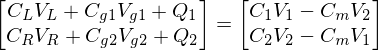

In [5]:
C1, C2 = symbols("C_1, C_2")

Qvec = Matrix([[Q1 + CL*VL + Cg1*Vg1], [Q2 + CR*VR + Cg2*Vg2]])
Cmat = Matrix([[C1, -Cm], [-Cm, C2]])
Vvec = Matrix([[V1], [V2]])

L1 = Qvec
R1 = Cmat * Vvec

Eq(L1, R1)

Here, $C_{1(2)}$ is the sum of all capacitances attached to dot $1(2)$ including $C_m$.
\begin{align}
C_{1(2)} = C_{L(R)} + C_{g1(2)} + C_m.
\end{align}

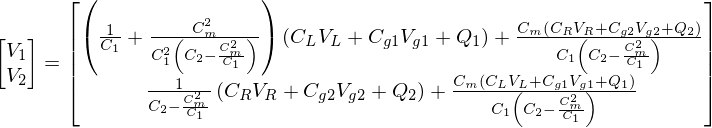

In [6]:
L2 = Vvec
R2 = Cmat.inv() * Qvec

Eq(L2, R2)

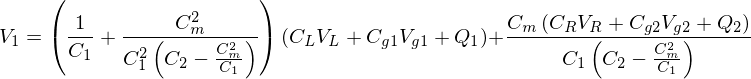

In [7]:
Eq(Vvec[0], R2[0])

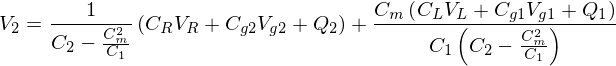

In [8]:
Eq(Vvec[1], R2[1])

Substituting $Q_{1(2)} = -N_{1(2)} |e|$, the potential energy becomes (for easier calculation, we substitute $D\equiv C_1C_2-C_m^2$)

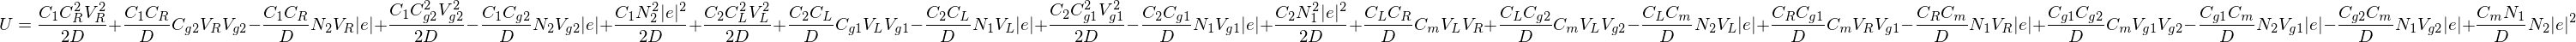

In [9]:
Usym, D = symbols("U, D")
U0 = simplify(( Qvec.T * Cmat.inv() * Qvec/2)[0].subs({Q1: -N1*e, Q2: -N2*e}).expand()).subs(C1*C2-Cm**2, D).expand()

Eq(Usym, U0)

We consider the linear transport regime where $V_L-V_R \approx 0$. We let $V_L = V_R=0$.

In [10]:
def simplify_by_term(e):
    new_args = []
    for term in e.args: 
        temp = simplify(term.factor())
        new_args.append(temp)
    e = Add(*new_args)
    return e

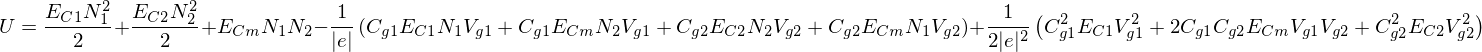

In [11]:
EC1, EC2, ECm = symbols("E_C1, E_C2, E_Cm")

U1 = U0.subs({C2: D*EC1/e**2, C1: D*EC2/e**2, Cm: D*ECm/e**2})

U2 = U1.subs({VL: 0, VR: 0})

U3 = collect(U2, [1/e, 1/e**2])

U3 = simplify_by_term(U3)

Eq(Usym, U3)

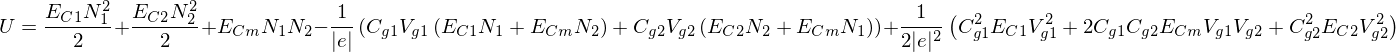

In [12]:
U4 = rcollect(U3, Cg1 * Vg1, Cg2 * Vg2)  # recursively collecting terms

Eq(Usym, U4)

where $E_{C1(2)}$ is the charing energy of the individual dot $1(2)$, $E_{Cm}$ is the electrostatic coupling energy, and $-|e|$ is the electron charge. The coupling energy $E_{Cm}$ is the change in energy of one dot when an electron is added to the other dot.

\begin{align}
E_{C1} = \frac{e^2}{C_1} \left( \frac{1}{1-\frac{C_m^2}{C_1C_2}}\right),\quad
E_{C1} = \frac{e^2}{C_2} \left( \frac{1}{1-\frac{C_m^2}{C_1C_2}}\right),\quad
E_{C1} = \frac{e^2}{C_m} \left( \frac{1}{\frac{C_1C_2}{C_m^2}-1}\right).
\end{align}

In [13]:
def U(N1, N2, Vg1, Vg2):
    """
    The double dot electrostatic energy function
    """
    return N1**2*EC1/2 + N2**2*EC2/2 + N1*N2*ECm + f(N1, N2, Vg1, Vg2)

def f(N1, N2, Vg1, Vg2):
    term1 = -((Cg1*Vg1*(N1*EC1+N2*ECm) + Cg2*Vg2*(N1*ECm+N2*EC2))/e)
    term2 = (Cg1**2*Vg1**2*EC1/2 + Cg2**2*Vg2**2*EC2/2 + Cg1*Vg1*Cg2*Vg2*ECm)/e**2
    return term1 + term2

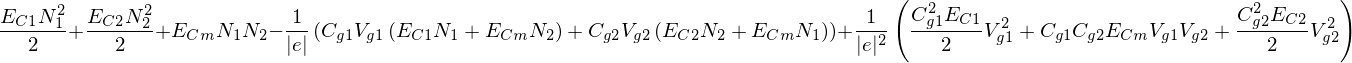

In [14]:
U(N1, N2, Vg1, Vg2)

#### Different Coupling Regime

##### a. $C_m = 0$ Case

$E_{Cm} = 0$, the electrostatic energy becomes

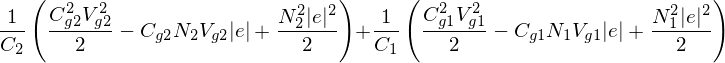

In [15]:
U_zero_Cm1 = U(N1, N2, Vg1, Vg2).subs({ECm: 0, EC1: e**2/C1, EC2: e**2/C2})
U_zero_Cm2 = collect(U_zero_Cm1.expand(), [1/C1, 1/C2])

U_zero_Cm2

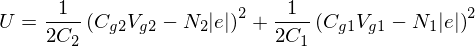

In [16]:
U_zero_Cm = simplify_by_term(U_zero_Cm2)
Eq(Usym, U_zero_Cm)

which is the sum of energies of two independent dots.

##### b. Dominant $C_m$ Case

$C_m / C_{1(2)}\rightarrow 1$, so that the energies approaches the values
\begin{align}
E_{C1} \rightarrow \frac{e^2}{\tilde{C}},\quad E_{C2} = \frac{e^2}{\tilde{C}}, \quad E_{Cm} = \frac{e^2}{\tilde{C}}.
\end{align}
the electrostatic energy is given by

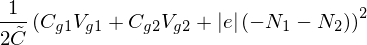

In [17]:
Ctilde = symbols("Ctilde")

U_dominant_Cm1 = U(N1, N2, Vg1, Vg2).subs({EC1: e**2/Ctilde, EC2: e**2/Ctilde, ECm: e**2/Ctilde})
U_dominant_Cm2 = U_dominant_Cm1.expand()
U_dominant_Cm3 = simplify_by_term(U_dominant_Cm2).factor()
U_dominant_Cm = rcollect(U_dominant_Cm3, e)

U_dominant_Cm

A large interdot capacitance $C_m$ effectively leads to one big dot.

### Electrochemical Potential

The electrochemical potential $\mu_{1(2)}(N_1, N_2)$ of dot $1(2)$ is defined as the energy needed to add the $N_{1(2)}$th electron to dot $1(2)$, while having $N_{2(1)}$ electrons on dot $2(1)$.

In [18]:
def mu1(N1, N2, Vg1, Vg2):
    """
    The electrochemical potential of dot 1
    """
    ee = U(N1, N2, Vg1, Vg2) - U(N1-1, N2, Vg1, Vg2)
    ee = simplify_by_term(collect(ee.expand(), [1/e]))
    return collect(ee, [EC1, ECm])

def mu2(N1, N2, Vg1, Vg2):
    """
    The electrochemical potential of dot 2
    """
    ee = U(N1, N2, Vg1, Vg2) - U(N1, N2-1, Vg1, Vg2)
    ee = simplify_by_term(collect(ee.expand(), [1/e]))
    return collect(ee, [EC2, ECm])

$\mu_1 (N_1, N_2) = U(N_1, N_2) - U(N_1-1, N_2)$ :

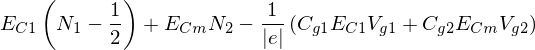

In [19]:
mu1(N1, N2, Vg1, Vg2)

$\mu_2 (N_1, N_2) = U(N_1, N_2) - U(N_1, N_2-1)$ :

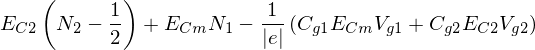

In [20]:
mu2(N1, N2, Vg1, Vg2)

##### a. Addition Energy of Dot 1

The change in $\mu_1(N_1, N_2)$ at fixed gate voltages, if $N_1$ is changed by $1$, $\mu_1(N_1+1, N_2) - \mu_1(N_1, N_2)$ :

In [21]:
simplify(mu1(N1+1, N2, Vg1, Vg2) - mu1(N1, N2, Vg1, Vg2).expand())

is called the <i>addition energy</i> of dot 1 and equals the charging energy of dot 1 in this classical regime.

##### b. Addition Energy of Dot 2

Similarly, the change in $\mu_2(N_1, N_2)$ at fixed gate voltages, if $N_2$ is changed by $1$, $\mu_2(N_1, N_2+1) - \mu_2(N_1, N_2)$ :

In [22]:
simplify(mu2(N1, N2+1, Vg1, Vg2) - mu2(N1, N2, Vg1, Vg2).expand())

is called the <i>addition energy</i> of dot 2 and equals the charging energy of dot 2 in this classical regime.

##### c. Coupling Energy

The change in $\mu_1(N_1, N_2)$ at fixed gate voltages, if $N_2$ is changed by $1$, $\mu_1(N_1, N_2+1) - \mu_1(N_1, N_2)$ :

In [23]:
simplify(mu1(N1, N2+1, Vg1, Vg2) - mu1(N1, N2, Vg1, Vg2).expand())

and the change in $\mu_2(N_1, N_2)$ at fixed gate voltages, if $N_1$ is changed by $1$, $\mu_2(N_1+1, N_2) - \mu_1(N_1, N_2)$ :

In [24]:
simplify(mu2(N1+1, N2, Vg1, Vg2) - mu2(N1, N2, Vg1, Vg2).expand())

is the same and has the value $E_{Cm}$.

#### Charge Stability Diagram

In [25]:
%matplotlib inline

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Update the matplotlib configuration parameters:
import matplotlib
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

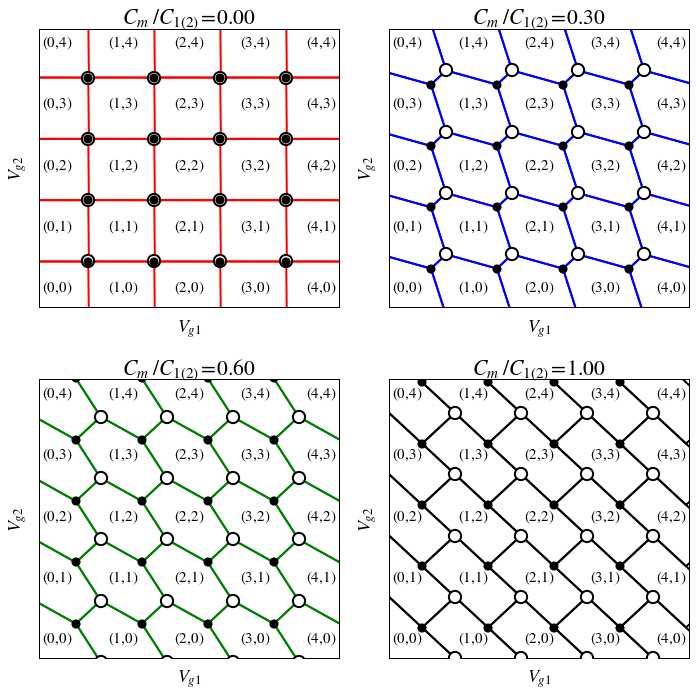

In [28]:
# method1 (generating honeycombs for given values of (n1, n2))
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig_color = ['red', 'blue', 'green', 'black']
    
for idx_ECm, ECm_EC in enumerate([0.001, 0.3, 0.6, 0.999]):
    subs_dic={Cg1: 1, Cg2: 1, EC1: 1, EC2: 1, ECm: ECm_EC, e: 1}
    mumu1 = mu1(N1, N2, Vg1, Vg2).subs(subs_dic)
    mumu2 = mu2(N1, N2, Vg1, Vg2).subs(subs_dic)        
    
    fig_row = idx_ECm // 2
    fig_col = idx_ECm % 2
    for n1 in range(5):
        for n2 in range(5):
            sol=[]
            # Getting six lines forming each honeycomb structure
            """
            electrochemical potential conditions:
            1. The addition energy of dot 1 to (n1, n2) should be negative.
            2. The addition energy of dot 2 to (n1, n2) should be negative.
            3. The addition energy of dot 1 to (n1+1, n2) should be positive.
            since n1 should be the largest possible number whose addition energy is negative.
            4. The addition energy of dot 2 to (n1, n2+1) should be positive.
            since n2 should be the largest possible number whose addition energy is negative.
            """
            sol.append(solve(mumu1.subs({N1:n1, N2:n2}), Vg2)[0])
            sol.append(solve(mumu2.subs({N1:n1, N2:n2}), Vg2)[0])
            sol.append(solve(mumu1.subs({N1:n1+1, N2:n2}), Vg2)[0])
            sol.append(solve(mumu2.subs({N1:n1, N2:n2+1}), Vg2)[0])            
            """
            degeneracy conditions:
            1. The energy gain is the same in (n1, n2-1)
            when increasing either N1 or N2 by 1 at the boundary.
            2. The energy gain is the same in (n1-1, n2)
            when increasing either N1 or N2 by 1 at the boundary.
            """
            sol.append(solve(mumu2.subs({N1:n1, N2:n2})
                         -mumu1.subs({N1:n1+1, N2:n2-1}), Vg2)[0])
            sol.append(solve(mumu1.subs({N1:n1, N2:n2})
                         -mumu2.subs({N1:n1-1, N2:n2+1}), Vg2)[0])

            # getting honeycomb x range
            """
            intersection of sol[0] and sol[5] corresponds to the leftmost point of the comb:
            """
            x_start = solve(sol[0]-sol[5], Vg1)[0]
            y_start = sol[0].subs(Vg1, x_start)
            """
            intersection of sol[2] and sol[4] corresponds to the rightmost point of the comb: 
            """
            x_end = solve(sol[2]-sol[4], Vg1)[0]
            y_end = sol[2].subs(Vg1, x_end)

            x_vec = np.arange(x_start, x_end, 0.01)
            y_vec = np.zeros((6, len(x_vec)))
                
            for idx in range(6):
                g = lambdify([Vg1], sol[idx], 'numpy')
                y_vec[idx, :] = g(x_vec)

            upper = np.minimum(np.minimum(y_vec[3, :], y_vec[5, :]), y_vec[2, :])  # upper part of each honeycomb
            lower = np.maximum(np.maximum(y_vec[0, :], y_vec[1, :]), y_vec[4, :])  # lower part of each honeycomb
        
            ax[fig_row, fig_col].plot(x_vec, upper, color=fig_color[idx_ECm], lw=2)
            ax[fig_row, fig_col].plot(x_vec, lower, color=fig_color[idx_ECm], lw=2)
            # annotating (n1, n2) values to each honeycomb
            ax[fig_row, fig_col].text((x_start+x_end-0.4)/2, (y_start+y_end)/2,
                r"$(%d, %d)$"% (n1, n2), fontsize=15, color="black")
            # marking electron-like and hole-like triple points
            ax[fig_row, fig_col].scatter(x_start, y_start, zorder=10, s=50, c='black', lw=2)
            ax[fig_row, fig_col].scatter(x_end, y_end, zorder=10, s=150, c='white', lw=2)

    # figure settings
    ax[fig_row, fig_col].set_xlabel(r'$V_{g1}$', labelpad=10)
    ax[fig_row, fig_col].set_ylabel(r'$V_{g2}$', labelpad=10)
    ax[fig_row, fig_col].set_xlim([-0.25, 4.3])
    ax[fig_row, fig_col].set_ylim([-0.25, 4.3])
    ax[fig_row, fig_col].set_title(r"$C_m/C_{1(2)} = %.2f$" % ECm_EC)
    ax[fig_row, fig_col].set_xticks([])
    ax[fig_row, fig_col].set_yticks([])
fig.tight_layout();

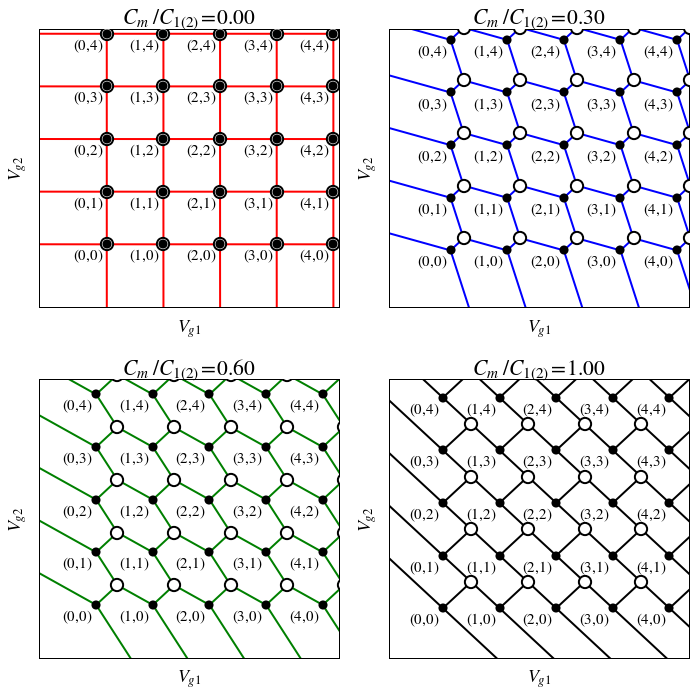

In [29]:
# method 2 (connecting triple points)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig_color = ['red', 'blue', 'green', 'black']

n=9 # largest N = n1+n2  to generate the stability diagram

def vecs_two_points(x1,y1,x2,y2):
    xstart = min(x1,x2)
    xend = max(x1,x2)
    x_vec = np.linspace(xstart, xend, 2)
    y_vec = (y2-y1)/(x2-x1) * (x_vec - x1) + y1
    return x_vec, y_vec

for idx_ECm, ECm_EC in enumerate([0.001, 0.3, 0.6, 0.999]):
    subs_dic={Cg1: 1, Cg2: 1, EC1: 1, EC2: 1, ECm: ECm_EC, e: 1}
    mumu1 = mu1(N1, N2, Vg1, Vg2).subs(subs_dic)
    mumu2 = mu2(N1, N2, Vg1, Vg2).subs(subs_dic)        
    
    row = idx_ECm // 2
    col = idx_ECm % 2
    
    #creating n by n numpy array
    elecX = np.zeros((n+1,n+1), dtype=float); elecY = np.zeros((n+1,n+1), dtype=float)
    holeX = np.zeros((n+1,n+1), dtype=float); holeY = np.zeros((n+1,n+1), dtype=float)
    
    for N in range(n):  # N = n1 + n2
        for n1 in range(N+1):
            n2 = N - n1
            
            sol=[]
            # Getting six lines forming each honeycomb structure
            """
            electrochemical potential conditions:
            """
            sol.append(solve(mumu2.subs({N1:n1, N2:n2+1}), Vg2)[0])
            sol.append(solve(mumu1.subs({N1:n1+1, N2:n2}), Vg2)[0])
            sol.append(solve(mumu1.subs({N1:n1+1, N2:n2+1}), Vg2)[0])
            sol.append(solve(mumu2.subs({N1:n1+1, N2:n2+1}), Vg2)[0])
            """
            intersection of sol[0] and sol[1] corresponds to the electron-like triple point:
            """
            elecX[n1,n2] = solve(sol[0]-sol[1], Vg1)[0]
            elecY[n1,n2] = sol[0].subs(Vg1, elecX[n1,n2])
            """
            intersection of sol[2] and sol[3] corresponds to the hole-like triple point: 
            """
            holeX[n1,n2] = solve(sol[2]-sol[3], Vg1)[0]
            holeY[n1,n2] = sol[2].subs(Vg1, holeX[n1,n2])
            holeX[-1, n2] = elecX[0,n2] - 2
            holeY[-1, n2] = sol[0].subs(Vg1, holeX[-1,n2])
            holeX[n1, -1] = elecX[n1,0] + 2
            holeY[n1, -1] = sol[1].subs(Vg1, holeX[n1,-1])
            
            coord0 = (elecX[n1,n2], elecY[n1,n2])
            x_vec, y_vec = [0,0,0],[0,0,0]
            x_vec[0], y_vec[0] = vecs_two_points(elecX[n1,n2], elecY[n1,n2], holeX[n1,n2-1],holeY[n1,n2-1])
            x_vec[1], y_vec[1] = vecs_two_points(elecX[n1,n2], elecY[n1,n2], holeX[n1-1,n2],holeY[n1-1,n2])
            x_vec[2], y_vec[2] = vecs_two_points(elecX[n1,n2], elecY[n1,n2], holeX[n1,n2],holeY[n1,n2])
            
            for j in range(3):
                ax[row, col].plot(x_vec[j], y_vec[j], color=fig_color[idx_ECm], lw=2)
            # marking electron-like and hole-like triple points
            ax[row, col].scatter(elecX[n1,n2], elecY[n1,n2], zorder=10, s=50, c='black', lw=2)
            ax[row, col].scatter(holeX[n1,n2], holeY[n1,n2], zorder=9, s=150, c='white', lw=2)    

            # annotating (n1, n2) values to each honeycomb
            if n1<5 and n2<5:
                ax[row, col].text(elecX[n1,n2]-0.6, elecY[n1,n2]-0.3,
                    r"$(%d, %d)$"% (n1, n2), fontsize=15, color="black")
 
    # figure settings
    ax[row, col].set_xlabel(r'$V_{g1}$', labelpad=10); ax[row, col].set_ylabel(r'$V_{g2}$', labelpad=10)
    ax[row, col].set_xlim([-0.7, 4.6]); ax[row, col].set_ylim([-0.7, 4.6])
    ax[row, col].set_title(r"$C_m/C_{1(2)} = %.2f$" % ECm_EC)
    ax[row, col].set_xticks([]); ax[row, col].set_yticks([])
fig.tight_layout();

Interpretation:
<ol>
<li>For a completely decoupled dots ($C_m = 0$) the diagram looks as in the 1st figure above (<b><font color="red">red</font></b>). In this regime, the gate voltage $V_{1(2)}$ changes the charge on dot $1(2)$, without affecting the charge on the other.</li>
<li>If the coupling is increased, the domains become <i>hexagonal</i> as in the 2nd and 3rd figure above (<b><font color="blue">blue</font></b> and <b><font color="green">green</font></b>). The vertices of the square domains have separated into "<b>triple points</b>."</li>
<li>When $C_m$ becomes the dominant capacitance ($C_m/C_{1(2)} \rightarrow 1$), the triple-point separation reaches its maximum, as in the last figure (<font color="black"><b>black</b></font>). The double dot behaves like one dot with charge $N_1 + N_2$.</li>
</ol>

#### Dimensions of the honeycomb cell

The dimensions of the honeycomb cell can be related to the capacitances

a. From $\mu_1(N_1, N_2; V_{g1}, V_{g2}) = \mu_1 (N_1+1, N_2; V_{g1}+\Delta V_{g1}, V_{g2})$, we obtain

In [30]:
delta = symbols("delta")

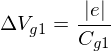

In [31]:
dVg1 = solve(mu1(N1+1, N2, Vg1+delta, Vg2) - mu1(N1, N2, Vg1, Vg2), delta)[0]
Eq(Symbol("{\Delta}V_{g1}"), dVg1)

Similarly, from $\mu_2(N_1, N_2; V_{g1}, V_{g2}) = \mu_2 (N_1, N_2+1; V_{g1}, V_{g2}+\Delta V_{g2})$,

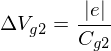

In [32]:
dVg2 = solve(mu1(N1, N2+1, Vg1, Vg2+delta) - mu1(N1, N2, Vg1, Vg2), delta)[0]
Eq(Symbol("{\Delta}V_{g2}"), dVg2)

b. From $\mu_1 (N_1, N_2; V_{g1}, V_{g2}) = \mu_1 (N_1, N_2+1; V_{g1} + \Delta V_{g1}^m, V_{g2})$,

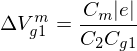

In [33]:
dVg1m = solve(mu1(N1, N2+1, Vg1+delta, Vg2) - mu1(N1, N2, Vg1, Vg2), delta)[0]
dVg1m = dVg1m.subs({EC1: e**2*C2/D, EC2: e**2*C1/D, ECm: e**2*Cm/D})
Eq(Symbol("{\Delta}V_{g1}^m"), dVg1m)

Similarly, from $\mu_2 (N_1, N_2; V_{g1}, V_{g2}) = \mu_2 (N_1+1, N_2; V_{g1} , V_{g2}+ \Delta V_{g2}^m)$,

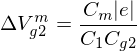

In [34]:
dVg2m = solve(mu2(N1+1, N2, Vg1, Vg2+delta) - mu2(N1, N2, Vg1, Vg2), delta)[0]
dVg2m = dVg2m.subs({EC1: e**2*C2/D, EC2: e**2*C1/D, ECm: e**2*Cm/D})
Eq(Symbol("{\Delta}V_{g2}^m"), dVg2m)

For a full characterization of all capacitances in the system, an analysis in the <i>nonlinear transport regime</i> is required.

In the above discussion, we have assumed that $V_{g1}$ and $V_{g2}$ only couple directly to the respective dots. However, there is a finite cross capacitance from one gate to the other in practice. The respective cross capacitances result in a change of the slope of the charge domain boundaries in teh honeycomb diagram.

### B. Quantized States

In [35]:
m, n = symbols("m, n", int=True)

def E_level(m):
    """
    Symbolic Expression for discrete Energy Levels
    """
    e = Symbol("E_{%s}" % m)
    return e

The strong conefinement of electrons in the dots can lead to the formation of a discrete energy spectrum.

The electrochemical potential for adding an electron into energy level $n$ of dot $i$ is denoted by $\mu_{i, n}$. Within the constant interaction model, $\mu_{i,n}$ is the sum of the classical electrochemical potential $\mu_{i}^{class}$ and the single-particle energy $E_n$:\begin{align}
\mu_{i, n} = \mu_{i}^{class} + E_n
\end{align}

In the language of SymPy, we express these into the following:

In [36]:
def mu1_quant(m, N1, N2, Vg1, Vg2):
    return mu1(N1, N2, Vg1, Vg2).expand() + E_level(m)

def mu2_quant(m, N1, N2, Vg1, Vg2):
    return mu2(N1, N2, Vg1, Vg2).expand() + E_level(m)

In the quantum regime, the addition energy for the $(N_1+1)$th electron occupying discrete level $m$, with the $N_1$ electron occupying discrete level $n$, becomes $\mu_{1, m}(N_1+1, N_2) - \mu_{1, n}(N_1, N_2)$ :

In [37]:
# addition energy of the dot 1
add_energy1 = mu1_quant(m, N1+1, N2, Vg1, Vg2) - mu1_quant(n, N1, N2, Vg1, Vg2)
add_energy1.subs(E_level(m)-E_level(n), Symbol("{\Delta} E"))

Similarly, we find the addition energy $\mu_{2,m}(N_1 , N_2+1) - \mu_{2, n}(N_1, N_2)$ of dot 2 :

In [38]:
# addition energy of the dot 2
add_energy2 = mu2_quant(m, N1, N2+1, Vg1, Vg2) - mu2_quant(n, N1, N2, Vg1, Vg2)
add_energy2.subs(E_level(m)-E_level(n), Symbol("{\Delta} E"))

The dimensions of the honeycomb cell are obtained as follows:

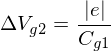

In [39]:
dVg1_quant = solve(mu2_quant(m, N1+1, N2, Vg1+delta, Vg2) - mu1_quant(n, N1, N2, Vg1, Vg2), delta)[0]
dVg1_quant = dVg1.subs(E_level(m)-E_level(n), Symbol("{\Delta} E"))
Eq(Symbol("{\Delta}V_{g2}"), dVg1_quant)

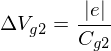

In [40]:
dVg2_quant = solve(mu2_quant(m, N1, N2+1, Vg1, Vg2+delta) - mu2_quant(n, N1, N2, Vg1, Vg2), delta)[0]
dVg2_quant = dVg2.subs(E_level(m)-E_level(n), Symbol("{\Delta} E"))
Eq(Symbol("{\Delta}V_{g2}"), dVg2_quant)

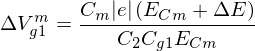

In [41]:
dVg1m_quant = solve(mu1_quant(m, N1, N2+1, Vg1+delta, Vg2) - mu1_quant(n, N1, N2, Vg1, Vg2), delta)[0]
dVg1m_quant = dVg1m_quant.subs({EC1: e**2*C2/D, EC2: e**2*C1/D}).subs(D, e**2*Cm/ECm)
dVg1m_quant = dVg1m_quant.subs(E_level(m)-E_level(n), Symbol("{\Delta} E"))
Eq(Symbol("{\Delta}V_{g1}^m"), dVg1m_quant)

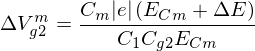

In [42]:
dVg2m_quant = solve(mu2_quant(m, N1+1, N2, Vg1, Vg2+delta) - mu2_quant(n, N1, N2, Vg1, Vg2), delta)[0]
dVg2m_quant = dVg2m_quant.subs({EC1: e**2*C2/D, EC2: e**2*C1/D}).subs(D, e**2*Cm/ECm)
dVg2m_quant = dVg2m_quant.subs(E_level(m)-E_level(n), Symbol("{\Delta} E"))
Eq(Symbol("{\Delta}V_{g2}^m"), dVg2m_quant)

The electronic configuration that gives the lowest possible total energy in dot $1(2)$ is referred to as the dot <i>ground state</i>; any configuration with a higher total energy is referred to as an <i>excited state</i>.

The electrochemical potential for adding the $N_{1(2)}$th electron to the lowest unfilled energy level of the $(N_{1(2)}-1)$th electron ground state is labeled $\mu_{1, 0}(N_1, N_2)\ \{\mu_{2, 0}(N_1, N_2)\}$; 

The electrochemical potential for adding the $N_{1(2)}$th 

#### Charge Stability Diagram (in a detailed picture)

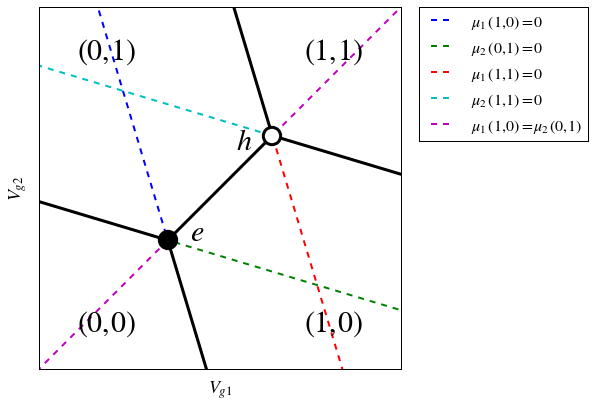

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ECm_EC = 0.3

subs_dic={Cg1: 1, Cg2: 1, EC1: 1, EC2: 1, ECm: ECm_EC, e: 1}
mumu1 = mu1(N1, N2, Vg1, Vg2).subs(subs_dic)
mumu2 = mu2(N1, N2, Vg1, Vg2).subs(subs_dic)        
    
sol=[]

# Getting lines forming a honeycomb
"""
electrochemical potential conditions:
1. The addition energy of dot 1 to (1, 0) should be negative.
2. The addition energy of dot 2 to (0, 1) should be negative.
"""
sol.append(solve(mumu1.subs({N1:1, N2:0}), Vg2)[0])   #(0,0) --> (1,0)
sol.append(solve(mumu2.subs({N1:0, N2:1}), Vg2)[0])   #(0,0) --> (0,1)
"""
3. The addition energy of dot 1 to (1, 1) should be positive.
4. The addition energy of dot 2 to (1, 1) should be positive.
"""
sol.append(solve(mumu1.subs({N1:1, N2:1}), Vg2)[0])   #(0,1) --> (1,1)
sol.append(solve(mumu2.subs({N1:1, N2:1}), Vg2)[0])   #(1,0) --> (1,1)
"""
degeneracy condition:
The transitions (0,0)->(1,0) and (0,0)->(0,1) are equally probable
"""
sol.append(solve(mumu2.subs({N1:0, N2:1})
            -mumu1.subs({N1:1, N2:0}), Vg2)[0])

# Getting the coordinates of triple points
"""
intersection of sol[0] and sol[4] corresponds to the left triple point
"""
x1 = solve(sol[0]-sol[4], Vg1)[0]; y1 = sol[0].subs(Vg1, x1)
"""
intersection of sol[2] and sol[4] corresponds to the right triple point 
"""
x2 = solve(sol[2]-sol[4], Vg1)[0]; y2 = sol[2].subs(Vg1, x2)

x_vec = np.arange(x1-1, x2+1, 0.01); 
y_vec = np.zeros((5, len(x_vec)))

labels = [r'$\mu_1 (1,0)=0$', r'$\mu_2 (0,1)=0$', r'$\mu_1 (1,1)=0$',
          r'$\mu_2 (1,1)=0$', r'$\mu_1(1,0)=\mu_2(0,1)$']

for idx in range(5):
    func = lambdify([Vg1], sol[idx], 'numpy')
    y_vec[idx, :] = func(x_vec)
    
    ax.plot(x_vec, y_vec[idx], ls='--', lw=2, label=labels[idx])

boundary1 = np.minimum(y_vec[0], y_vec[1])
boundary2 = np.maximum(y_vec[2], y_vec[3])

x_vec2 = np.arange(x1, x2, 0.01)
degeneracy = lambdify([Vg1], sol[4], 'numpy')(x_vec2)

ax.plot(x_vec, boundary1, ls='-', lw=3, color='black')
ax.plot(x_vec, boundary2, ls='-', lw=3, color='black')
ax.plot(x_vec2, degeneracy, ls='-', lw=3, color='black')

ax.scatter(x1, y1, zorder=10, s=300, c='black', lw=3)
ax.scatter(x2, y2, zorder=10, s=300, c='white', lw=3)

# marking the charge states
ax.text(x1-0.2, y1-0.2, r"$(0, 0)$", fontsize=30, color="black")
ax.text(x1+0.3, y1-0.2, r"$(1, 0)$", fontsize=30, color="black")
ax.text(x1-0.2, y1+0.4, r"$(0, 1)$", fontsize=30, color="black")
ax.text(x1+0.3, y1+0.4, r"$(1, 1)$", fontsize=30, color="black")

ax.text(x1+0.05, y1, r"$e$", fontsize=30, color="black")
ax.text(x2-0.08, y2-0.03, r"$h$", fontsize=30, color="black")

ax.set_xlabel(r'$V_{g1}$', labelpad=10); ax.set_ylabel(r'$V_{g2}$', labelpad=10)
ax.set_xlim([0.1, 0.9]); ax.set_ylim([0.1, 0.9])
ax.set_xticks([]); ax.set_yticks([])
fig.tight_layout()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=16);

## Nonlinear transport regime

### A. Classical Theory

Assume that the bias voltage is applied to the left lead ($\mu_L = -|e|V$ where $V<0$) and that the right lead is grounded ($\mu_R = 0$).

The conductance regions at finite change from triple points to <i>triangularly shaped</i> regions. The conditions
\begin{align}
-|e|V = \mu_L \geq \mu_1,\quad \mu_1 \geq  \mu_2,\quad \mu_2 \geq \mu_R=0
\end{align}
determine the boundaries of the triangular regions.

#### The double dot stability diagram at finite bias voltage

In [44]:
V = Symbol("V", real=True)
muL = lambda V: -e * V

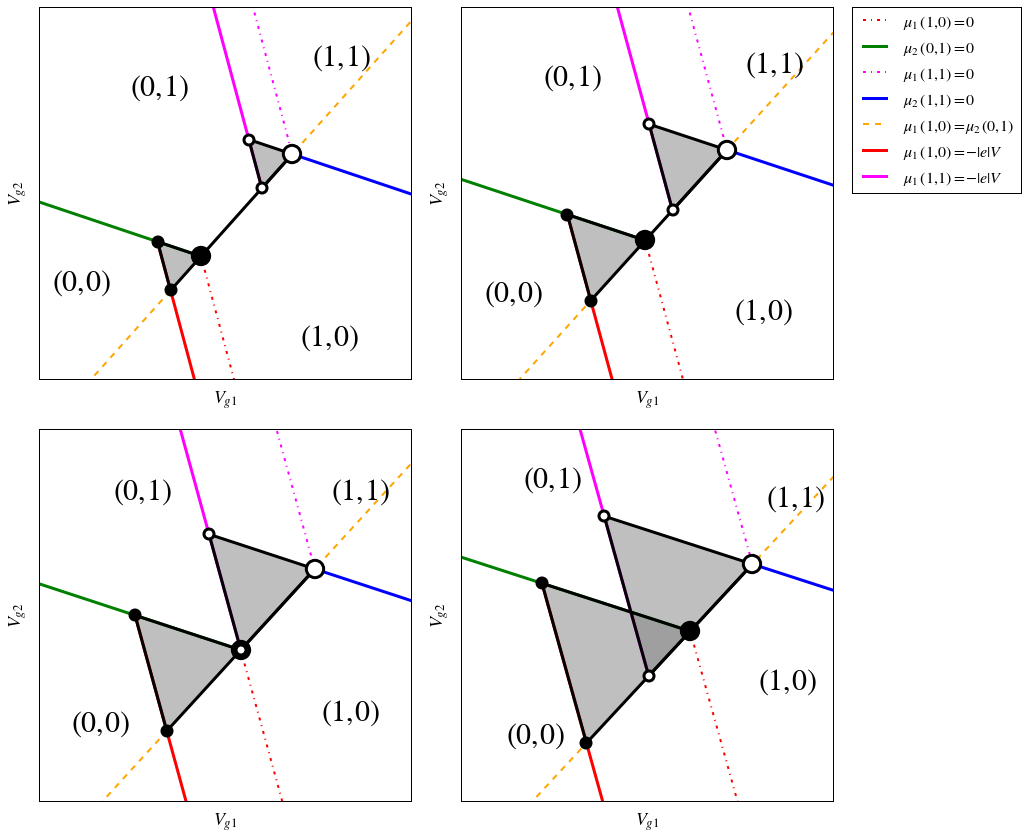

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

n1, n2 = 0, 0
ECm_EC = 0.3
for fig_idx, Vbias in enumerate([-0.1, -0.2, -0.3, -0.5]):
    row = fig_idx//2
    col = fig_idx%2
    
    subs_dic = {Cg1: 1, Cg2: 1, EC1: 1, EC2: 1, ECm: ECm_EC, e: 1, V: Vbias}
    mumu1 = mu1(N1, N2, Vg1, Vg2).subs(subs_dic); mumu2 = mu2(N1, N2, Vg1, Vg2).subs(subs_dic)        
    mumuL = muL(V).subs(subs_dic)

    sol=[]
    # Getting lines forming a honeycomb
    """
    electrochemical potential conditions:
    1. The addition energy of dot 1 to (1, 0) should be negative.
    2. The addition energy of dot 2 to (0, 1) should be negative.
    """
    sol.append(solve(mumu1.subs({N1:n1+1, N2:n2}), Vg2)[0])   #(0,0) --> (1,0)
    sol.append(solve(mumu2.subs({N1:n1, N2:n2+1}), Vg2)[0])   #(0,0) --> (0,1)
    """
    3. The addition energy of dot 1 to (1, 1) should be positive.
    4. The addition energy of dot 2 to (1, 1) should be positive.
    """
    sol.append(solve(mumu1.subs({N1:n1+1, N2:n2+1}), Vg2)[0])   #(0,1) --> (1,1)
    sol.append(solve(mumu2.subs({N1:n1+1, N2:n2+1}), Vg2)[0])   #(1,0) --> (1,1)
    """
    degeneracy condition:
    The transitions (0,0)->(1,0) and (0,0)->(0,1) are equally probable
    """
    sol.append(solve(mumu2.subs({N1:n1, N2:n2+1})
                -mumu1.subs({N1:n1+1, N2:n2}), Vg2)[0])

    sol.append(solve(mumu1.subs({N1:n1+1, N2:n2}) - mumuL, Vg2)[0])
    sol.append(solve(mumu1.subs({N1:n1+1, N2:n2+1}) - mumuL, Vg2)[0])

    funcs = [lambdify([Vg1], sol[idx], 'numpy') for idx in range(7)]

    # Getting the coordinates of triple points
    elec_x, elec_y, hole_x, hole_y = [], [], [], []
    """
    intersection of sol[0] and sol[4] corresponds to the electron-like triple point (linear transport regime)
    """
    elec_x.append(solve(sol[0]-sol[4], Vg1)[0]); elec_y.append(sol[0].subs(Vg1, elec_x[0]))
    """
    intersection of sol[2] and sol[4] corresponds to the hole-like triple point (linear transport regime)
    """
    hole_x.append(solve(sol[2]-sol[4], Vg1)[0]); hole_y.append(sol[2].subs(Vg1, hole_x[0]))
    """
    Other electron-like and hole-like triple points generated in the non-linear transport regime
    """
    elec_x.append(solve(sol[5]-sol[4], Vg1)[0]); elec_y.append(sol[5].subs(Vg1, elec_x[1]))
    elec_x.append(solve(sol[5]-sol[1], Vg1)[0]); elec_y.append(sol[5].subs(Vg1, elec_x[2]))
    hole_x.append(solve(sol[6]-sol[4], Vg1)[0]); hole_y.append(sol[6].subs(Vg1, hole_x[1]))
    hole_x.append(solve(sol[6]-sol[3], Vg1)[0]); hole_y.append(sol[6].subs(Vg1, hole_x[2]))

    s_list = [300, 100, 100]

    for idx in range(3):
        ax[row,col].scatter(elec_x[idx], elec_y[idx], zorder=10, s=s_list[idx], c='black', lw=3)
        ax[row,col].scatter(hole_x[idx], hole_y[idx], zorder=10, s=s_list[idx], c='white', lw=3)

    x_vecs = []

    x_vecs.append(np.arange(elec_x[0], elec_x[0]+1, 0.001))
    x_vecs.append(np.arange(elec_x[2]-1, elec_x[0], 0.001))
    x_vecs.append(np.arange(hole_x[0]-1, hole_x[0], 0.001))
    x_vecs.append(np.arange(hole_x[0], hole_x[0]+1, 0.001))
    x_vecs.append(np.arange(elec_x[2]-1, hole_x[0]+1, 0.001))
    x_vecs.append(np.arange(elec_x[2], elec_x[2]+1, 0.001))
    x_vecs.append(np.arange(hole_x[1]-1, hole_x[1], 0.001))

    label_list = [r'$\mu_1 (1,0)=0$', r'$\mu_2 (0,1)=0$', r'$\mu_1 (1,1)=0$', r'$\mu_2 (1,1)=0$', 
                  r'$\mu_1(1,0)=\mu_2(0,1)$', r'$\mu_1(1,0)=-|e|V$', r'$\mu_1(1,1)=-|e|V$']
    ls_list = ['-.', '-', '-.', '-', '--', '-', '-']; lw_list = [2, 3, 2, 3, 2, 3, 3]
    color_list = ['red', 'green', 'magenta', 'blue', 'orange', 'red', 'magenta']

    for idx in range(7):
        ax[row,col].plot(x_vecs[idx], (funcs[idx])(x_vecs[idx]), ls = ls_list[idx],
                label=label_list[idx], lw=lw_list[idx], color = color_list[idx])

    xvec_t1 = np.arange(elec_x[2], elec_x[0], 0.001, dtype=float)
    xvec_t2 = np.arange(hole_x[2], hole_x[0], 0.001, dtype=float)

    lower_t1 = np.maximum(funcs[4](xvec_t1), funcs[5](xvec_t1))
    upper_t1 = funcs[1](xvec_t1)
    lower_t2 = np.maximum(funcs[4](xvec_t2), funcs[6](xvec_t2))
    upper_t2 = funcs[3](xvec_t2)

    ax[row,col].plot(xvec_t1, lower_t1, ls='-', color='black', lw=3)
    ax[row,col].plot(xvec_t1, upper_t1, ls='-', color='black', lw=3)
    ax[row,col].fill_between(xvec_t1, lower_t1, upper_t1, color='gray', alpha=0.5)

    ax[row,col].plot(xvec_t2, lower_t2, ls='-', color='black', lw=3)
    ax[row,col].plot(xvec_t2, upper_t2, ls='-', color='black', lw=3)
    ax[row,col].fill_between(xvec_t2, lower_t2, upper_t2, color='gray', alpha=0.5)

    xvec_d = np.arange(elec_x[0], hole_x[0], 0.001)
    ax[row,col].plot(xvec_d, funcs[4](xvec_d), ls='-', color='black', lw=3)

    #marking the charge states
    ax[row,col].text(elec_x[1]-0.3, elec_y[1], r"$(%d, %d)$" % (n1, n2), fontsize=30, color="black")
    ax[row,col].text(elec_x[0]+0.25, elec_y[0]-0.2, r"$(%d, %d)$" % (n1+1, n2), fontsize=30, color="black")
    ax[row,col].text(hole_x[2]-0.3, hole_y[2]+0.1, r"$(%d, %d)$"% (n1, n2+1), fontsize=30, color="black")
    ax[row,col].text(hole_x[0]+0.05, hole_y[0]+0.2, r"$(%d, %d)$"% (n1+1, n2+1), fontsize=30, color="black")

    ax[row,col].set_xlabel(r'$V_{g1}$', labelpad=10)
    ax[row,col].set_ylabel(r'$V_{g2}$', labelpad=10)
    ax[row,col].set_xlim([float(elec_x[2])-0.3, float(hole_x[0])+0.3])
    ax[row,col].set_ylim([float(elec_y[1])-0.2, float(hole_y[2])+0.3])
    ax[row,col].set_xticks([]); ax[row,col].set_yticks([])

ax[0,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=16)
fig.tight_layout();

As the absolute value of the bias voltage $|V|$ increases ($V$ becomes more negative), the triangular regions grow and even overlap.

The dimensions of the triangles $\delta V_{g1}$ and $\delta V_{g2}$ are defined by the following equations:

\begin{align}
\mu_1 (N_1, N_2; V_{g1}+\delta V_{g1}, V_{g2}) = \mu_1 (N_1, N_2; V_{g1}, V_{g2}) + |e|V
\end{align}

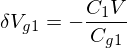

In [46]:
dVg1 = solve(mu1(N1, N2, Vg1+delta, Vg2) - mu1(N1, N2, Vg1, Vg2) - e*V, delta)[0].subs(EC1, e**2/C1)
deltaVg1 = Symbol("{\delta} V_g1")
Eq(deltaVg1, dVg1)

\begin{align}
\mu_2(N_1, N_2; V_{g1}, V_{g2}+\delta V_{g2}) = \mu_2 (N_1, N_2; V_{g1}, V_{g2}) + |e|V
\end{align}

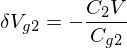

In [47]:
dVg2 = solve(mu2(N1, N2, Vg1, Vg2+delta) - mu2(N1, N2, Vg1, Vg2) - e*V, delta)[0].subs(EC2, e**2/C2)
deltaVg2 = Symbol("{\delta} V_g2")
Eq(deltaVg2, dVg2)

Introducing the conversion factors between the gate voltage and energy 
\begin{align}
\alpha_1 = \frac{C_{g1}}{C_2} |e|,\quad \alpha_2 = \frac{C_{g2}}{C_2} |e|,
\end{align}
the equalities can be expressed as:
\begin{align}
\alpha_1 \delta V_{g1} = \alpha_2 \delta V_{g2} = |eV|.
\end{align}

### B. Quantized States

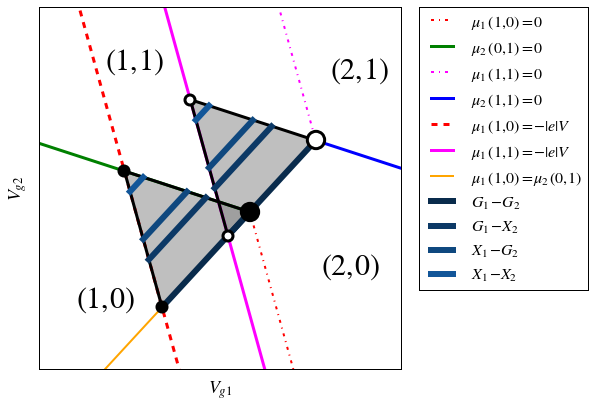

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

n1, n2 = 1, 0
ECm_EC = 0.3
Vbias = -0.4

subs_dic = {Cg1: 1, Cg2: 1, EC1: 1, EC2: 1, ECm: ECm_EC, e: 1, V: Vbias}
mumu1 = mu1(N1, N2, Vg1, Vg2).subs(subs_dic); mumu2 = mu2(N1, N2, Vg1, Vg2).subs(subs_dic)        
mumuL = muL(V).subs(subs_dic)

sol=[]
# Getting lines forming a honeycomb
"""
electrochemical potential conditions:
"""
sol.append(solve(mumu1.subs({N1:n1+1, N2:n2}), Vg2)[0])   #(0,0) --> (1,0)
sol.append(solve(mumu2.subs({N1:n1, N2:n2+1}), Vg2)[0])   #(0,0) --> (0,1)
sol.append(solve(mumu1.subs({N1:n1+1, N2:n2+1}), Vg2)[0])   #(0,1) --> (1,1)
sol.append(solve(mumu2.subs({N1:n1+1, N2:n2+1}), Vg2)[0])   #(1,0) --> (1,1)

sol.append(solve(mumu1.subs({N1:n1+1, N2:n2}) - mumuL, Vg2)[0])
sol.append(solve(mumu1.subs({N1:n1+1, N2:n2+1}) - mumuL, Vg2)[0])

dE1, dE2 = 0.2, 0.14

sol.append(solve(mumu2.subs({N1:n1, N2:n2+1})
            -mumu1.subs({N1:n1+1, N2:n2}), Vg2)[0]) # G1-G2
sol.append(solve(mumu2.subs({N1:n1, N2:n2+1})+dE2
            -mumu1.subs({N1:n1+1, N2:n2}), Vg2)[0])  # G1-X2
sol.append(solve(mumu2.subs({N1:n1, N2:n2+1})
            -mumu1.subs({N1:n1+1, N2:n2})+dE1, Vg2)[0]) # X1-G2
sol.append(solve(mumu2.subs({N1:n1, N2:n2+1})+dE2
            -mumu1.subs({N1:n1+1, N2:n2})+dE1, Vg2)[0]) # X1-X2

funcs = [lambdify([Vg1], sol[idx], 'numpy') for idx in range(10)]


# Getting the coordinates of triple points
elec_x, elec_y, hole_x, hole_y = [], [], [], []
"""
intersection of sol[0] and sol[6] corresponds to the electron-like triple point (linear transport regime)
"""
elec_x.append(solve(sol[0]-sol[6], Vg1)[0]); elec_y.append(sol[0].subs(Vg1, elec_x[0]))
"""
intersection of sol[2] and sol[6] corresponds to the hole-like triple point (linear transport regime)
"""
hole_x.append(solve(sol[2]-sol[6], Vg1)[0]); hole_y.append(sol[2].subs(Vg1, hole_x[0]))
"""
Other electron-like and hole-like triple points generated in the non-linear transport regime
"""
elec_x.append(solve(sol[4]-sol[6], Vg1)[0]); elec_y.append(sol[4].subs(Vg1, elec_x[1]))
elec_x.append(solve(sol[4]-sol[1], Vg1)[0]); elec_y.append(sol[4].subs(Vg1, elec_x[2]))
hole_x.append(solve(sol[5]-sol[6], Vg1)[0]); hole_y.append(sol[5].subs(Vg1, hole_x[1]))
hole_x.append(solve(sol[5]-sol[3], Vg1)[0]); hole_y.append(sol[5].subs(Vg1, hole_x[2]))

s_list = [300, 100, 100]

for idx in range(3):
    ax.scatter(elec_x[idx], elec_y[idx], zorder=10, s=s_list[idx], c='black', lw=3)
    ax.scatter(hole_x[idx], hole_y[idx], zorder=10, s=s_list[idx], c='white', lw=3)

x_vecs = []

x_vecs.append(np.arange(elec_x[0], elec_x[0]+1, 0.001))
x_vecs.append(np.arange(elec_x[2]-1, elec_x[0], 0.001))
x_vecs.append(np.arange(hole_x[0]-1, hole_x[0], 0.001))
x_vecs.append(np.arange(hole_x[0], hole_x[0]+1, 0.001))
x_vecs.append(np.arange(elec_x[2]-1, hole_x[0]+1, 0.001))
x_vecs.append(np.arange(elec_x[2], elec_x[2]+1, 0.001))
x_vecs.append(np.arange(hole_x[1]-1, hole_x[1], 0.001))

label_list = [r'$\mu_1 (1,0)=0$', r'$\mu_2 (0,1)=0$', r'$\mu_1 (1,1)=0$', r'$\mu_2 (1,1)=0$', 
                r'$\mu_1(1,0)=-|e|V$', r'$\mu_1(1,1)=-|e|V$', r'$\mu_1(1,0)=\mu_2(0,1)$']
ls_list = ['-.', '-', '-.', '-', '--', '-', '-']; lw_list = [2, 3, 2, 3, 3, 3, 2]
color_list = ['red', 'green', 'magenta', 'blue', 'red', 'magenta', 'orange']

for idx in range(7):
    ax.plot(x_vecs[idx], (funcs[idx])(x_vecs[idx]), ls = ls_list[idx],
            label=label_list[idx], lw=lw_list[idx], color = color_list[idx])

xvecs_quant = [[],[]]

#xvecs_quant[0].append(np.arange(elec_x[1], hole_x[0], 0.001)) # G1-G2
for idx in range(6, 10): # G1-X2, X1-G2, X1-X2
    xvecs_quant[0].append(np.arange(solve(sol[4]-sol[idx], Vg1)[0], solve(sol[1]-sol[idx], Vg1)[0], 0.001))
    
#xvecs_quant[1].append(np.arange(elec_x[1], hole_x[0], 0.001)) # G1-G2
for idx in range(6, 10): # G1-X2, X1-G2, X1-X2
    xvecs_quant[1].append(np.arange(solve(sol[5]-sol[idx], Vg1)[0], solve(sol[3]-sol[idx], Vg1)[0], 0.001))
    
color_list_quant = ['#092b4c', '#0c3966', '#0f487f', '#125699']
label_list_quant = [r'$G_1 - G_2$', r'$G_1 - X_2$', r'$X_1 - G_2$', r'$X_1 - X_2$']

for i in range(2):
    for idx in range(6, 10):
        idx_ = idx-6
        ax.plot(xvecs_quant[i][idx_], funcs[idx](xvecs_quant[i][idx_]), lw=6, zorder=9,
                color=color_list_quant[idx_], label=(label_list_quant[idx_] if i==0 else None))
    
xvec_t1 = np.arange(elec_x[2], elec_x[0], 0.001, dtype=float)
xvec_t2 = np.arange(hole_x[2], hole_x[0], 0.001, dtype=float)

lower_t1 = np.maximum(funcs[6](xvec_t1), funcs[4](xvec_t1)); upper_t1 = funcs[1](xvec_t1)
lower_t2 = np.maximum(funcs[6](xvec_t2), funcs[5](xvec_t2)); upper_t2 = funcs[3](xvec_t2)

ax.plot(xvec_t1, lower_t1, ls='-', color='black', lw=3)
ax.plot(xvec_t1, upper_t1, ls='-', color='black', lw=3)
ax.fill_between(xvec_t1, lower_t1, upper_t1, color='gray', alpha=0.5)

ax.plot(xvec_t2, lower_t2, ls='-', color='black', lw=3)
ax.plot(xvec_t2, upper_t2, ls='-', color='black', lw=3)
ax.fill_between(xvec_t2, lower_t2, upper_t2, color='gray', alpha=0.5)

xvec_d = np.arange(elec_x[0], hole_x[0], 0.001)
ax.plot(xvec_d, funcs[6](xvec_d), ls='-', color='black', lw=3)

#marking the charge states
ax.text(elec_x[1]-0.3, elec_y[1], r"$(%d, %d)$" % (n1, n2), fontsize=30, color="black")
ax.text(elec_x[0]+0.25, elec_y[0]-0.2, r"$(%d, %d)$" % (n1+1, n2), fontsize=30, color="black")
ax.text(hole_x[2]-0.3, hole_y[2]+0.1, r"$(%d, %d)$"% (n1, n2+1), fontsize=30, color="black")
ax.text(hole_x[0]+0.05, hole_y[0]+0.2, r"$(%d, %d)$"% (n1+1, n2+1), fontsize=30, color="black")

ax.set_xlabel(r'$V_{g1}$', labelpad=10)
ax.set_ylabel(r'$V_{g2}$', labelpad=10)
ax.set_xlim([float(elec_x[2])-0.3, float(hole_x[0])+0.3])
ax.set_ylim([float(elec_y[1])-0.2, float(hole_y[2])+0.3])
ax.set_xticks([]); ax.set_yticks([])

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=16)
fig.tight_layout();

# Version Information

In [1]:
%reload_ext version_information

%version_information numpy, matplotlib, sympy

Software versions
Python 3.4.1 (default, Sep 20 2014, 19:44:17) [GCC 4.2.1 Compatible Apple LLVM 5.1 (clang-503.0.40)]
IPython 2.3.0
OS posix [darwin]
numpy 1.9.0
matplotlib 1.4.0
sympy 0.7.5-git
<tr><td colspan='2'>Tue Oct 07 16:20:06 2014 JST</td></tr>